## WORLD CUP WINING PERCENT

 ### Data
- Downloaded from http://www.indiawaterportal.org/met_data/
- Event: World cup win
- Teams: ENG, NZ, IND, E&CA, WI, AUS, PAK, SL
- Team Distributation: Group A and B
-  World cup Range: 1975 to 1983 on a quartilely year basis

### Data Scraping
- import libraries

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

- Eliminate warinings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data for worldcup-1975
url_1='https://www.espncricinfo.com/table/series/8039/season/1975/icc-cricket-world-cup'
#Data for worldcup-1979
url_2='https://www.espncricinfo.com/table/series/8039/season/1979/icc-cricket-world-cup'
#Data for worldcup-1983
url_3='https://www.espncricinfo.com/table/series/8039/season/1983/icc-cricket-world-cup'
#Create a list and store the urls
urls=[url_1, url_2, url_3]

'''#############################
   create a function for scaping 
   the tablular data form urls
   #############################
'''
def data(url):
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')


    tr_elements = doc.xpath('//tr')
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        #print('%d:"%s"'%(i,name))
        col.append((name,[]))


    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]
        
        #If row is not of size 10, the //tr data is not from our table 
        if len(T)!=7:
            break
        
        #i is the index of our column
        i=0
        
        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1
    #print([len(C) for (title,C) in col])
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df


for i,url in enumerate(urls):   
    df=data(url)
    #print(df)
    #create csv for each url(world cup) data
    df.to_csv('WorldCupWins{}.csv'.format(i)) 

In [4]:
# Read each csv file and concatinate or append into one dataframe
data_1=pd.read_csv("/home/shri/Desktop/cricket/WorldCupWins0.csv")
data_2=pd.read_csv('/home/shri/Desktop/cricket/WorldCupWins1.csv')
data_3=pd.read_csv('/home/shri/Desktop/cricket/WorldCupWins2.csv')
data_2=data_1.append(data_2)
data=data_2.append(data_3)

#or
'''
for i in range(3):
    data = pd.read_csv("/home/shri/Desktop/cricket/WorldCupWins{}.csv".format(i))
    #print(df['Team'])
    data_temp = pd.DataFrame()
    data_temp['Team'] = df['Team']
    data_temp['TotalMatch'] = df['M']
    data_temp['PT'] = df['PT']
    data_temp.to_csv("WorldCupWinsFull{}.csv".format(i))
    
'''

Drop the unnecessery columns
- Unnamed: 0 


In [5]:
data= data.drop(columns=['Unnamed: 0')
data= data.drop([4], axis=0)

- Check data types
- check missing variables


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 8
Data columns (total 7 columns):
Team    24 non-null object
M       24 non-null object
W       24 non-null object
L       24 non-null object
T       24 non-null object
N/R     24 non-null object
PT      24 non-null object
dtypes: object(7)
memory usage: 1.5+ KB



- Convert datatypes of variables 

In [7]:
#print(data.info())#
data["M"]= data["M"].astype(int) 
data["PT"]= data["PT"].astype(int) 
data["L"]= data["L"].astype(int) 
data["W"]= data["W"].astype(int) 
data["T"]= data["T"].astype(int) 
data['N/R']=data['N/R'].astype(int)

### Feature Engineering
- Indexing

In [8]:
data.insert(0, 'New_ID', range(0, 0 + len(data)))
data.set_index('New_ID',inplace=True)


#### Add  Variable named wining probablity 
 - (Get point  / total points ) / 100

In [9]:
data['Total_points'] = data['M'] * 4
#print(data)
data["wining_percent"]=(data["PT"] / data['Total_points'])*100
data=data.round({ "wining_percent":2}) 

- Wining probability can be categories into three categories based on the thresholding range

In [10]:
data['wining_percent_prob'] = 0
#print(data.index)
for ind in data.index:
    if data['wining_percent'][ind] >= 60.0:
        data['wining_percent_prob'][ind] = "HIGH"
    elif 69.0 >= data['wining_percent'][ind] >= 50.0:

        data['wining_percent_prob'][ind] = "MIGHT"
    else:
        data['wining_percent_prob'][ind] = "LOW"


In [11]:
data.head(2)

,Team,M,W,L,T,N/R,PT,Total_points,wining_percent,wining_percent_prob
New_ID,,,,,,,,,,
0,ENG,3,3,0,0,0,12,12,100.00,HIGH
1,NZ,3,2,1,0,0,8,12,66.67,HIGH


- Three years world cup data can be prepared and save into csv file

In [12]:
data.to_csv('WorldCupWins_phase_1.csv')

### Exploratery Data Analysis
- Read the dataset

In [13]:
data=pd.read_csv("/home/shri/Desktop/cricket/WorldCupWins_phase_1.csv")
data.head(2)

,Unnamed: 0,Team,M,W,L,T,N/R,PT,Total_points,wining_percent
0,0,ENG,3,3,0,0,0,12,12,100.00
1,1,NZ,3,2,1,0,0,8,12,66.67


- Drop the unwanted columns

In [14]:
data= data.drop(columns=['Unnamed: 0', 'T'])
data

,Team,M,W,L,N/R,PT,Total_points,wining_percent
0,ENG,3,3,0,0,12,12,100.00
1,NZ,3,2,1,0,8,12,66.67
2,IND,3,1,2,0,4,12,33.33
3,E&CA,3,0,3,0,0,12,0.00
4,WI,3,3,0,0,12,12,100.00
5,AUS,3,2,1,0,8,12,66.67
6,PAK,3,1,2,0,4,12,33.33
7,SL,3,0,3,0,0,12,0.00
8,ENG,3,3,0,0,12,12,100.00
9,PAK,3,2,1,0,8,12,66.67


- Measure Central Tendency

In [15]:
data.describe()

,M,W,L,N/R,PT,Total_points,wining_percent
count,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.00000,1.958333,1.958333,0.083333,8.000000,16.000000,50.000000
std,1.44463,1.458980,1.488482,0.282330,5.808539,5.778521,33.333261
min,3.00000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,3.00000,1.000000,1.000000,0.000000,4.000000,12.000000,29.165000
50%,3.00000,2.000000,2.000000,0.000000,8.000000,12.000000,50.000000
75%,6.00000,3.000000,3.000000,0.000000,12.000000,24.000000,70.835000
max,6.00000,5.000000,5.000000,1.000000,20.000000,24.000000,100.000000


### Univariant Analyis

Numarical Attribute
- Histogram PLotting
- Box plotting
- Density plot

In [16]:
num_cols = data._get_numeric_data().columns#list of numarical variables
num_cols

Index(['M', 'W', 'L', 'N/R', 'PT', 'Total_points', 'wining_percent'], dtype='object')

Variable_name: M


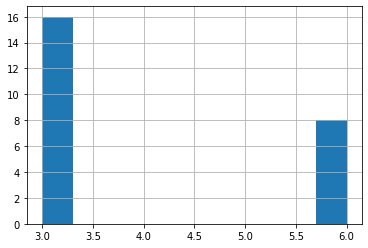

Variable_name: W


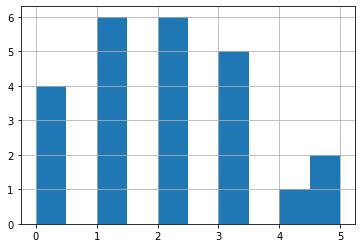

Variable_name: L


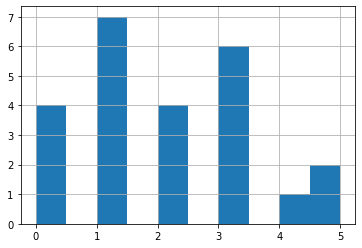

Variable_name: N/R


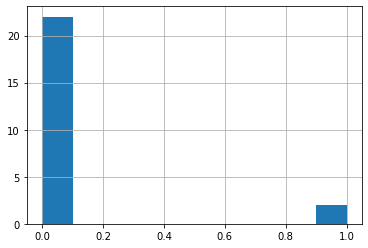

Variable_name: PT


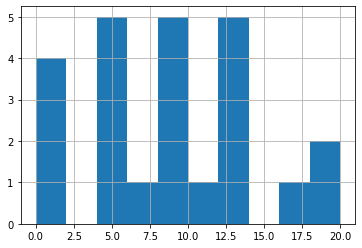

Variable_name: Total_points


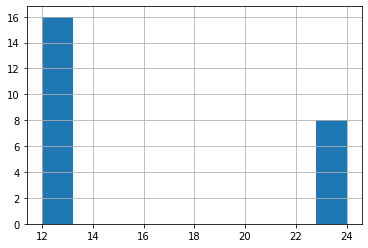

Variable_name: wining_percent


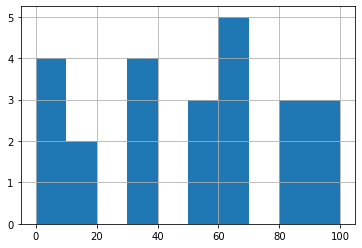

In [17]:
for i in num_cols:
    print('Variable_name:',i)
    #Histogram Plot
    data[i].hist()
    plt.show()

Variable_name: M


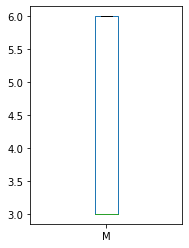

Variable_name: W


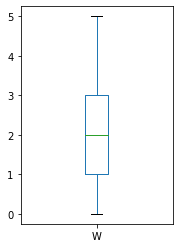

Variable_name: L


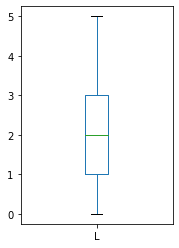

Variable_name: N/R


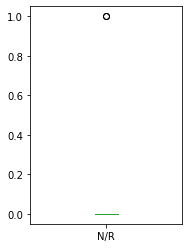

Variable_name: PT


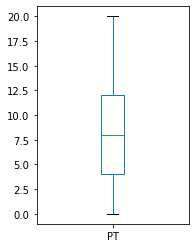

Variable_name: Total_points


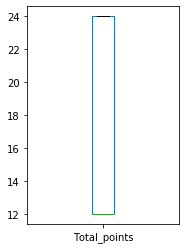

Variable_name: wining_percent


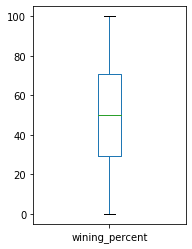

In [18]:
for i in num_cols:
    print('Variable_name:',i)
    #Box Plot
    data[i].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
    plt.show()

Variable_name: M


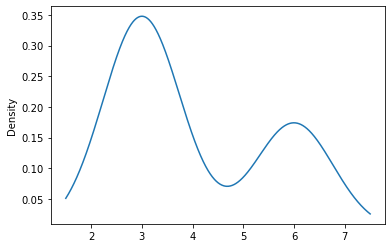

Variable_name: W


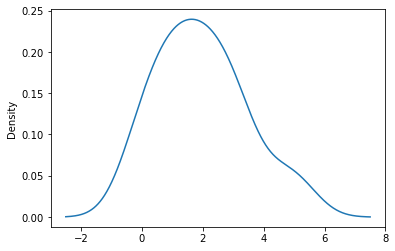

Variable_name: L


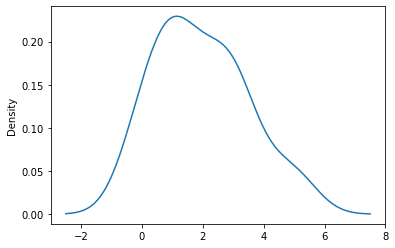

Variable_name: N/R


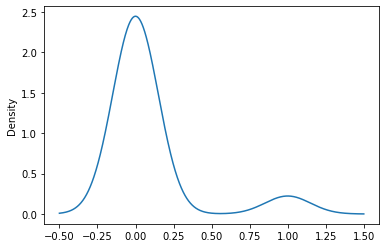

Variable_name: PT


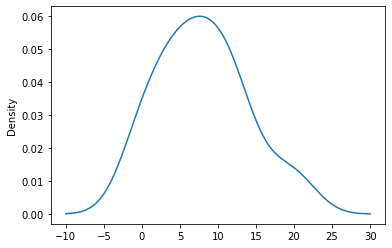

Variable_name: Total_points


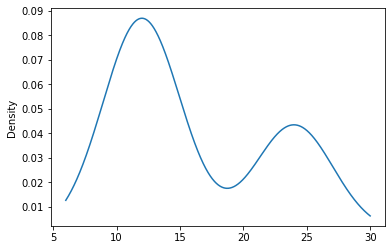

Variable_name: wining_percent


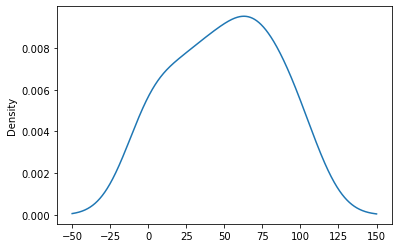

In [19]:
for i in num_cols:
    print('Variable_name:',i)
    #Density Plot
    data[i].plot.kde()
    plt.show()

Categorical Variables
- Bar Plot

In [20]:
cols = data.columns
num_cols = data._get_numeric_data().columns#list of numarical variables
cat_cols=list(set(cols) - set(num_cols))
cat_cols

['Team']

Variable_name: Team


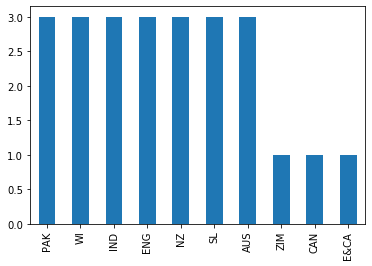

In [21]:
#Bar_plot:-Categorical values
for i in cat_cols:
    print('Variable_name:',i)
    data[i].value_counts().head(10).plot.bar()
    plt.show()


### Bivariant Analysis
- Scatter Plot

In [22]:
data.corr()

,M,W,L,N/R,PT,Total_points,wining_percent
M,1.000000,0.515711,0.505489,-2.132007e-01,4.974160e-01,1.000000,0.000000
W,0.515711,1.000000,-0.461310,-9.675589e-02,9.953081e-01,0.515711,0.804605
L,0.505489,-0.461310,1.000000,-3.017578e-01,-4.928192e-01,0.505489,-0.817864
N/R,-0.213201,-0.096756,-0.301758,1.000000e+00,-1.471732e-18,-0.213201,0.153983
PT,0.497416,0.995308,-0.492819,-1.471732e-18,1.000000e+00,0.497416,0.823367
Total_points,1.000000,0.515711,0.505489,-2.132007e-01,4.974160e-01,1.000000,0.000000
wining_percent,0.000000,0.804605,-0.817864,1.539830e-01,8.233667e-01,0.000000,1.000000


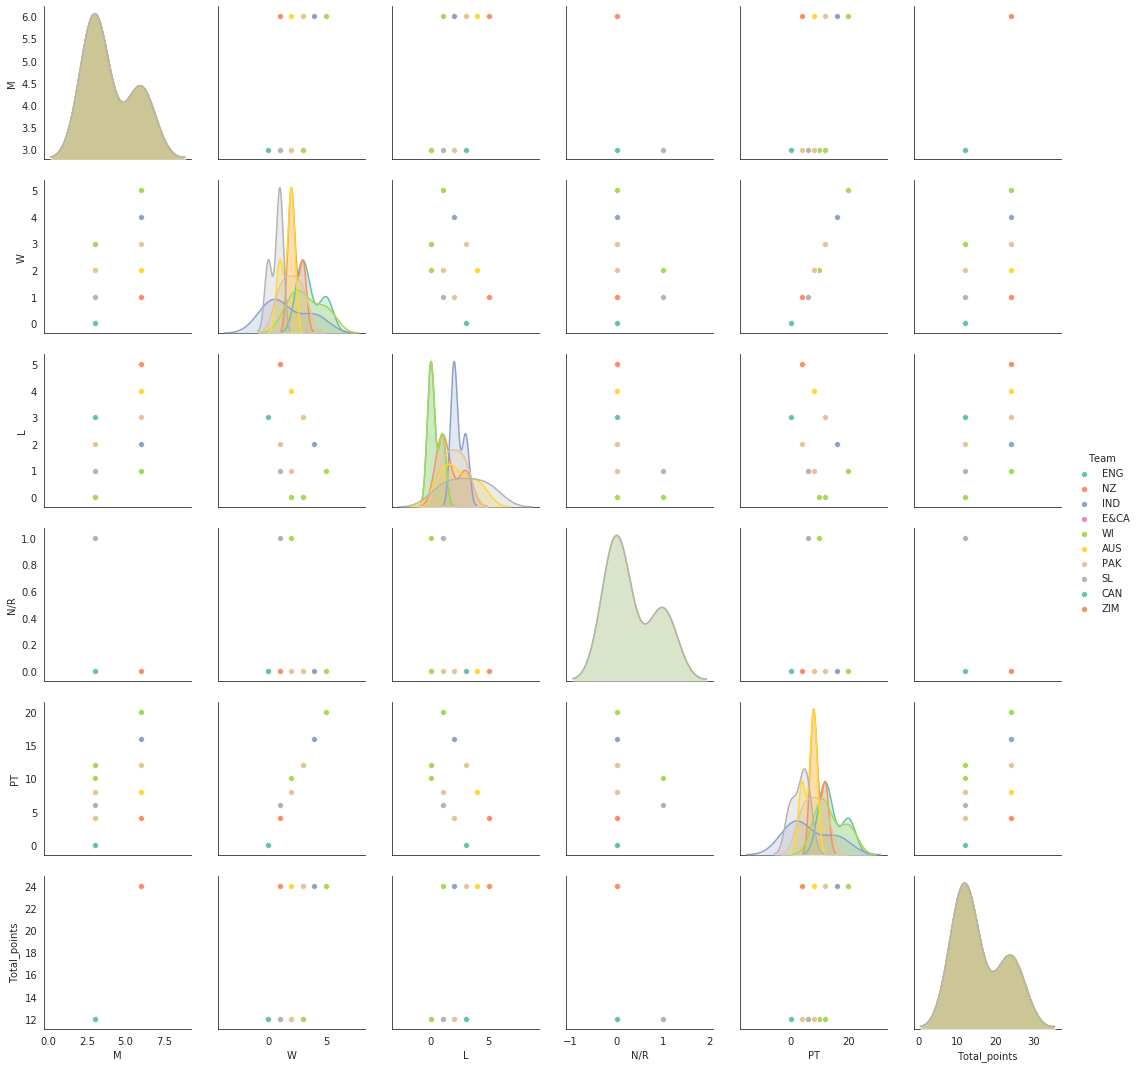

In [23]:
import pandas.plotting 
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
sns.set_style("white")
sns.pairplot(data.iloc[:,0:-1], hue='Team', palette='Set2');

### Model Building
- Importing Necessary Libraries

In [24]:
import requests 
import lxml.html as lh 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Dataset split 
- Input variables
- Target variables

In [26]:
array = data.values
X = array[:,0:6]
#print(X)
Y = array[:,7]
#print(Y)

Lable Encoding 
- Input variable {Team} 
- Taget variable

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
X[:,0] = labelencoder.fit_transform(X[:,0])
#print(Y)
#print(X)

Dataset Split 
- Training Dataset = 80%
- Validation Dataset = 20%

In [28]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

- Initialization model and Test options and evaluation metric


In [29]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [30]:
seed = 7
scoring = 'accuracy'
#print(Y_validation)
#print(Y_train)

In [31]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.300000 (0.331662)
LDA: 0.750000 (0.335410)
KNN: 0.250000 (0.403113)
CART: 0.600000 (0.374166)
NB: 0.350000 (0.320156)
SVM: 0.350000 (0.320156)


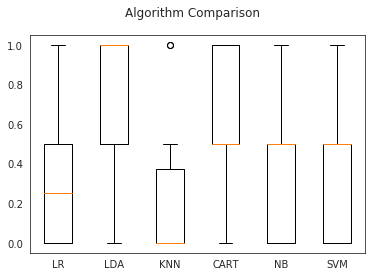

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4
[[1 0 0]
 [0 1 0]
 [0 3 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.42      0.67      0.47         5
weighted avg       0.25      0.40      0.28         5

